<a href="https://colab.research.google.com/github/AndreaBur/AI_Implementation/blob/main/clasif_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📄 Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



<Figure size 600x500 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


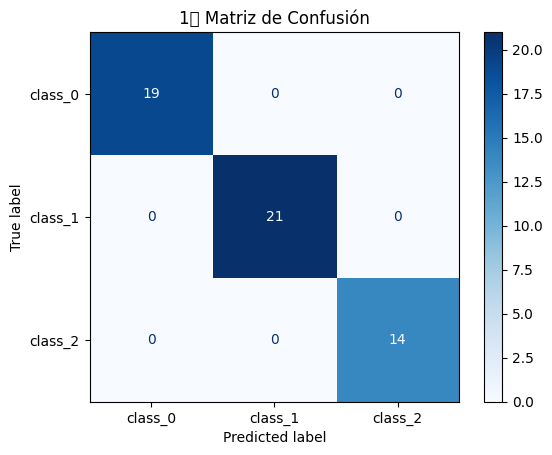

<ipython-input-1-8fe5f35ed50e>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias[indices], y=np.array(feature_names)[indices], palette="viridis")
<ipython-input-1-8fe5f35ed50e>:54: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


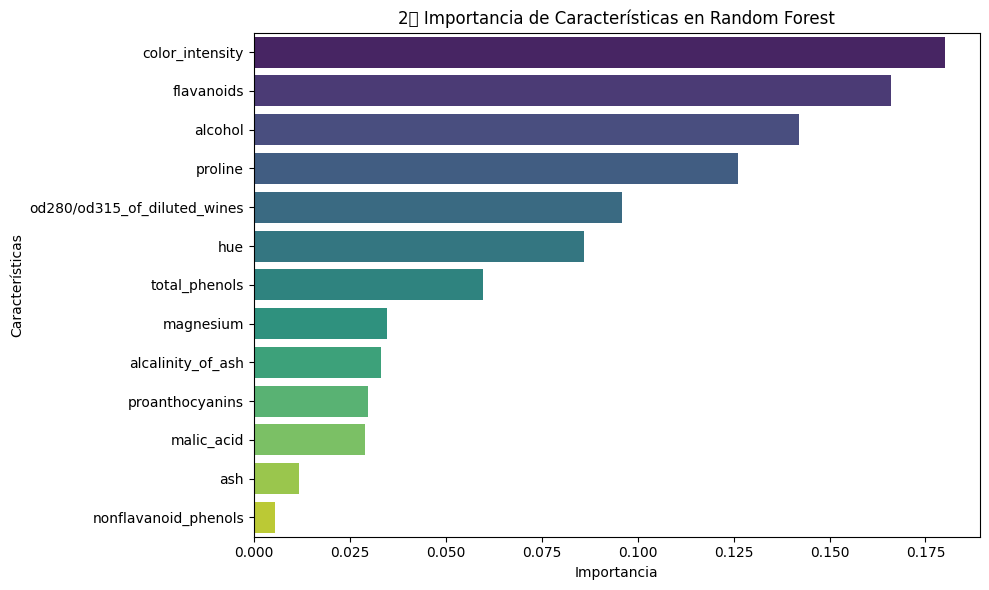

<ipython-input-1-8fe5f35ed50e>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_names, y=precision_per_class, palette="crest")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


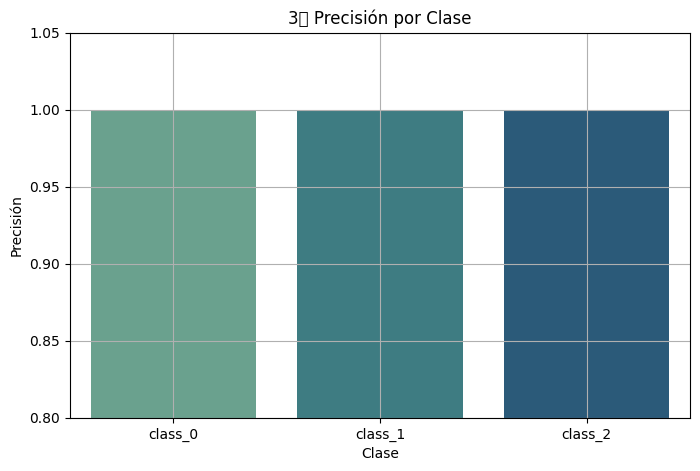

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


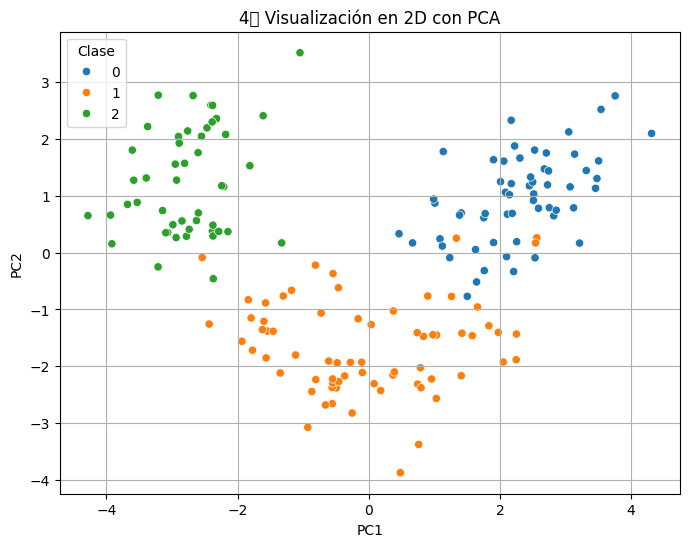

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install -q scikit-learn matplotlib seaborn

# Paso 2: Importar librerías
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Paso 3: Cargar datos
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Paso 4: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 5: Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Paso 6: Predicciones
y_pred = model.predict(X_test)

# Paso 7: Reporte
print("📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# ===== VISUALIZACIÓN 1: Matriz de Confusión =====
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues", values_format='d')
plt.title("1️⃣ Matriz de Confusión")
plt.grid(False)
plt.show()

# ===== VISUALIZACIÓN 2: Importancia de Características =====
importancias = model.feature_importances_
indices = np.argsort(importancias)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importancias[indices], y=np.array(feature_names)[indices], palette="viridis")
plt.title("2️⃣ Importancia de Características en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

# ===== VISUALIZACIÓN 3: Precisión por clase =====
precision_per_class = precision_score(y_test, y_pred, average=None)
plt.figure(figsize=(8,5))
sns.barplot(x=target_names, y=precision_per_class, palette="crest")
plt.ylim(0.8, 1.05)
plt.title("3️⃣ Precisión por Clase")
plt.ylabel("Precisión")
plt.xlabel("Clase")
plt.grid(True)
plt.show()

# ===== VISUALIZACIÓN 4: PCA en 2D =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Clase"] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Clase", palette="tab10")
plt.title("4️⃣ Visualización en 2D con PCA")
plt.grid(True)
plt.show()
